In [1]:
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import numpy as np
import matplotlib.pyplot as plt
#from sqlalchemy import create_engine

In [2]:
def connectDB(DB):
    # connect to the PostgreSQL server
    return psycopg2.connect(
        database=DB,
        user="postgres",
        password="Georgetown16",
        host="database-1.c5vispb5ezxg.us-east-1.rds.amazonaws.com",
        port='5432')

def disconnectDB():
    cur.close()
    conn.close()

In [3]:
# connect to "Dataset" DB 
conn = connectDB("Dataset")

# extract everything from 'table_name' into a dataframe
df = pd_sql.read_sql(f"select * from public.\"FinalData\" ", con=conn)
pd.set_option('display.max_column',50)
df.head()

,index,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,Ireland,id_student,code_module,module_domain,module_presentation_length,term,year,num_of_prev_attempts,final_result,date_registration,disability,gender,age_band,region,highest_education,imd_band,studied_credits,b4_sum_clicks,qtr_sum_clicks,half_sum_clicks,threeqtr_sum_clicks,qtr_half_sum_clicks,half_threeqtr_sum_clicks,thrd_sum_clicks,twothrd_sum_clicks,thrd_twothrd_sum_clicks,allclicks,std_half_score
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3733,3,1,261,0,0,0,0,-68.0,0,0,2,3,3,9.0,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,6516,0,0,269,0,1,0,1,-52.0,0,0,2,0,3,8.0,60,256.0,862.0,1347.0,2066.0,513.0,719.0,1040.0,1875.0,307.0,2791.0,0.564000
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,8462,3,1,261,0,0,0,0,-137.0,0,0,2,2,3,3.0,90,81.0,446.0,565.0,565.0,119.0,0.0,525.0,565.0,40.0,646.0,0.581667
3,3,0,0,1,0,0,0,0,0,0,0,0,0,0,8462,3,1,262,0,1,1,0,-38.0,0,0,2,2,3,3.0,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.860000
4,4,0,1,0,0,0,0,0,0,0,0,0,0,0,11391,0,0,268,0,0,0,1,-159.0,0,0,2,1,3,9.0,240,98.0,447.0,612.0,650.0,165.0,38.0,489.0,615.0,123.0,934.0,0.816000


## Gradient Boosting Classifiers Model for Year 2013 STEM Class

In [4]:
## Create a temporary data frame for Year 2013 Term J and Term B STEM class
tempDf = df[['year','term','module_domain','code_module',
             'Scotland','East Anglian Region','London Region','South Region','North Western Region','West Midlands Region',
             'South West Region','East Midlands Region','South East Region','Wales','Yorkshire Region','North Region',
             'gender','disability','b4_sum_clicks','half_sum_clicks','std_half_score','date_registration','age_band',
             'module_presentation_length','num_of_prev_attempts','final_result','highest_education','imd_band','studied_credits']]
tempDf = tempDf.loc[(tempDf.year == 0)&(tempDf.module_domain==1)]
# Show first 5 observations of the dataset
tempDf.head(5)

,year,term,module_domain,code_module,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,gender,disability,b4_sum_clicks,half_sum_clicks,std_half_score,date_registration,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits
0,0,0,1,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.000000,-68.0,2,261,0,0,3,9.0,60
2,0,0,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,81.0,565.0,0.581667,-137.0,2,261,0,0,3,3.0,90
9,0,1,1,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.000000,-128.0,0,240,0,0,2,4.0,90
21,0,0,1,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,111.0,367.0,0.146667,-47.0,1,268,2,0,3,8.0,60
26,0,0,1,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.000000,-61.0,1,268,0,0,1,0.0,30


In [5]:
# drop missing values
tempDf=tempDf.dropna()
tempDf.count()

year                          7786
term                          7786
module_domain                 7786
code_module                   7786
Scotland                      7786
East Anglian Region           7786
London Region                 7786
South Region                  7786
North Western Region          7786
West Midlands Region          7786
South West Region             7786
East Midlands Region          7786
South East Region             7786
Wales                         7786
Yorkshire Region              7786
North Region                  7786
gender                        7786
disability                    7786
b4_sum_clicks                 7786
half_sum_clicks               7786
std_half_score                7786
date_registration             7786
age_band                      7786
module_presentation_length    7786
num_of_prev_attempts          7786
final_result                  7786
highest_education             7786
imd_band                      7786
studied_credits     

In [6]:
# After dropping those missing values, we have 7786 observatios for the dataset
# Define our predictors
X=tempDf[['code_module','Scotland','East Anglian Region','London Region','South Region','North Western Region',
          'West Midlands Region','South West Region','East Midlands Region','South East Region','Wales',
          'Yorkshire Region','North Region','gender','disability','b4_sum_clicks','half_sum_clicks','std_half_score',
          'date_registration','age_band','module_presentation_length','num_of_prev_attempts','highest_education','imd_band','studied_credits']]
y=tempDf['final_result']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

Text(0, 0.5, 'Feature Importance Score')

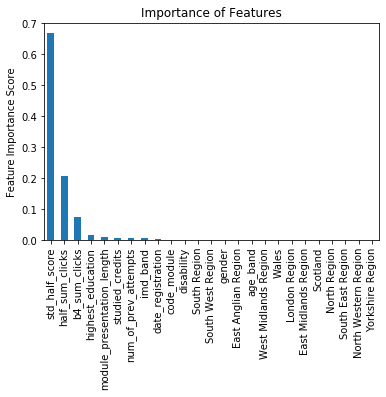

In [8]:
## Run a Baseline Model without Tuning
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

In [9]:
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
y_pred=baseline.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy of the GBM on test set: 0.893
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1069
           1       0.85      0.92      0.89       878

    accuracy                           0.89      1947
   macro avg       0.89      0.90      0.89      1947
weighted avg       0.90      0.89      0.89      1947



## Now let's use three most important features to run our model again.

In [10]:
# Define our predictors
X=tempDf[['std_half_score','half_sum_clicks','b4_sum_clicks']]
y=tempDf['final_result']

In [11]:
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
featureimportant=GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
featureimportant.fit(X_train,y_train)
print('Accuracy of the GBM on test set: {:.3f}'.format(featureimportant.score(X_test, y_test)))
y_pred=featureimportant.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy of the GBM on test set: 0.889
              precision    recall  f1-score   support

           0       0.92      0.87      0.90      1069
           1       0.85      0.91      0.88       878

    accuracy                           0.89      1947
   macro avg       0.89      0.89      0.89      1947
weighted avg       0.89      0.89      0.89      1947



In [13]:
#### Use most three important features give us very close accuracy rate as we run baseline model

## Let's start tuning our parameters

In [14]:
## We can try tuning our learning rate and n_estimators
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([0.1782382 , 0.4268528 , 0.85159655, 1.28665538, 1.76440663,
         2.22736964, 2.59172692, 3.10832319, 0.18411131, 0.45461359,
         0.88129478, 1.32712674, 1.78078008, 2.31187983, 2.70668368,
         3.11351914, 0.179778  , 0.44585996, 0.87834091, 1.3115499 ,
         1.82131181, 2.15473523, 2.66696448, 3.2241684 , 0.18169522,
         0.49544778, 0.95289125, 1.35393276, 1.79800115, 2.26521559,
         2.61628504, 3.09025164, 0.19327259, 0.4679903 , 0.94937286,
         1.37343464, 1.83889298, 2.27879224, 2.73550858, 3.17124758,
         0.18358879, 0.46264324, 0.96495514, 1.42076263, 1.89814596,
         2.33363342, 2.90701318, 3.02338462]),
  'std_fit_time': array([0.00493669, 0.00416778, 0.00838983, 0.01399225, 0.02513687,
         0.03331991, 0.04554339, 0.05474135, 0.01019347, 0.00978268,
         0.02710239, 0.03483791, 0.05053368, 0.05130526, 0.06721379,
         0.04870011, 0.00539266, 0.00567128, 0.00184582, 0.02113317,
         0.0362583 , 0.

In [16]:
# We use 0.01 learning rate and 1000 n_estimators
# Let's evaluate of final model on the test dataset
new=GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000,max_depth=3, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', subsample=1, random_state=10)
new.fit(X_train,y_train)
print('Accuracy of the GBM on test set: {:.3f}'.format(new.score(X_test, y_test)))
y_pred=new.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy of the GBM on test set: 0.893
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1069
           1       0.86      0.92      0.89       878

    accuracy                           0.89      1947
   macro avg       0.89      0.90      0.89      1947
weighted avg       0.90      0.89      0.89      1947



In [58]:
## The final model performs slightly better than the model after the first stage of parameter tuning 
## if applied to the test set. 

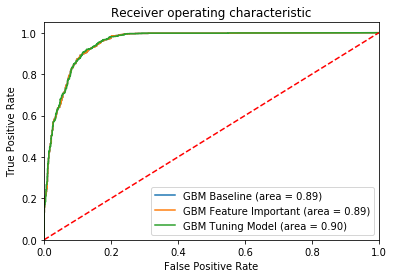

In [17]:
# Comparsion of ROC AUC curve
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 

baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)

featureimportant=GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
featureimportant.fit(X_train,y_train)

new=GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000,max_depth=3, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', subsample=1, random_state=10)
new.fit(X_train,y_train)

#calculate values for ROC AUC plot

#baseline model
baseline_roc_auc = roc_auc_score(y_test, baseline.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, baseline.predict_proba(X_test)[:,1])

#feature important model
featureimportant_roc_auc = roc_auc_score(y_test, featureimportant.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, featureimportant.predict_proba(X_test)[:,1])

#new tuned model 
new_roc_auc = roc_auc_score(y_test, new.predict(X_test))
fprnew, tprnew, thresholds_new = roc_curve(y_test, new.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fprB, tprB, label='GBM Baseline (area = %0.2f)' % baseline_roc_auc)
plt.plot(fpr1, tpr1, label='GBM Feature Important (area = %0.2f)' % featureimportant_roc_auc)
plt.plot(fprnew, tprnew, label='GBM Tuning Model (area = %0.2f)' % new_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Igore the following lines of code

In [18]:
# Scale our data by creating an instance of the scaler and scaling it
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [19]:
## import machine learning algorithms
# from sklearn.ensemble import GradientBoostingClassifier

In [20]:
# build and train GradientBoostingClassifier model
# lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
# for learning_rate in lr_list:
#     gbc=GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_depth=1, random_state=0).fit(X_train, y_train)
#     print("Learning rate: ", learning_rate)
#     print("Accuracy score (training): {0:.3f}".format(gbc.score(X_train, y_train)))
#     print("Accuracy score (validation): {0:.3f}".format(gbc.score(X_val, y_val)))


In [21]:
new=GradientBoostingClassifier(learning_rate=0.1, n_estimators=1000,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
new.fit(X_train,y_train)
print('Accuracy of the GBM on test set: {:.3f}'.format(new.score(X_test, y_test)))
y_pred=featureimportant.predict(X_test)

Accuracy of the GBM on test set: 0.884


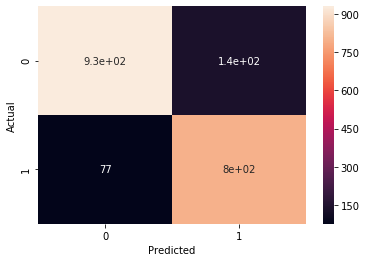

In [22]:
# Get a Confusion Matrix
import seaborn as sns
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90      1069
           1       0.85      0.91      0.88       878

    accuracy                           0.89      1947
   macro avg       0.89      0.89      0.89      1947
weighted avg       0.89      0.89      0.89      1947



In [24]:
print(X.columns,featureimportant.feature_importances_)

Index(['std_half_score', 'half_sum_clicks', 'b4_sum_clicks'], dtype='object') [0.67013926 0.23669063 0.09317011]


In [25]:
## Create a temporary data frame for Year 2014 Term J and Term B STEM class
tempDf2 = df[['year','term','module_domain','code_module','gender','disability','b4_sum_clicks','half_sum_clicks','std_half_score','date_registration','age_band','module_presentation_length','num_of_prev_attempts','final_result','highest_education','imd_band','studied_credits']]
tempDf2 = tempDf2.loc[(tempDf2.year ==1)&(tempDf2.module_domain==1)]
# Show first 5 observations of the dataset
tempDf2.head(5)

,year,term,module_domain,code_module,gender,disability,b4_sum_clicks,half_sum_clicks,std_half_score,date_registration,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits
3,1,0,1,3,0,0,0.0,0.0,0.860000,-38.0,2,262,1,0,3,3.0,60
7,1,0,1,2,1,0,181.0,475.0,0.743250,-110.0,0,269,0,1,2,5.0,120
10,1,1,1,3,1,0,3.0,1069.0,0.796667,-54.0,0,241,1,1,2,4.0,60
13,1,1,1,4,0,0,51.0,757.0,0.845556,-47.0,0,241,0,1,3,9.0,60
14,1,0,1,2,1,0,201.0,796.0,0.039000,-114.0,0,269,0,0,3,4.0,60


In [26]:
tempDf2.count()

year                          12562
term                          12562
module_domain                 12562
code_module                   12562
gender                        12562
disability                    12562
b4_sum_clicks                 12562
half_sum_clicks               12562
std_half_score                12562
date_registration             12562
age_band                      12562
module_presentation_length    12562
num_of_prev_attempts          12562
final_result                  12562
highest_education             12562
imd_band                      12562
studied_credits               12562
dtype: int64

In [27]:
tempDf2=tempDf2.dropna()

In [28]:
df2 = pd.DataFrame(tempDf2,columns= ['std_half_score','half_sum_clicks','b4_sum_clicks'])

In [29]:
# X=tempDf[['std_half_score','half_sum_clicks','b4_sum_clicks']]
# y=tempDf['final_result']
# # Split the dataset to train and test
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
# # build and train GradientBoostingClassifier model
# gbct1=GradientBoostingClassifier(n_estimators=100, learning_rate=0.25, max_depth=1, random_state=0).fit(X_train, y_train)
y_pred_new = new.predict(df2)
y_test_new=tempDf2['final_result']

In [30]:
# Print the Accuracy
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test_new, y_pred_new))

Accuracy:  0.8603725521413788


## Create a temporary data frame for Year 2013 Social Science Class

In [31]:
## Create a temporary data frame for Year 2013 Term J and Term B Social Science class
tempDf3 = df[['year','term','module_domain','code_module',
             'Scotland','East Anglian Region','London Region','South Region','North Western Region','West Midlands Region',
             'South West Region','East Midlands Region','South East Region','Wales','Yorkshire Region','North Region',
             'gender','disability','b4_sum_clicks','half_sum_clicks','std_half_score','date_registration','age_band',
             'module_presentation_length','num_of_prev_attempts','final_result','highest_education','imd_band','studied_credits']]
tempDf3 = tempDf3.loc[(tempDf3.year == 0)&(tempDf3.module_domain==0)]
# Show first 20 observations of the dataset
tempDf.head(20)

,year,term,module_domain,code_module,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,gender,disability,b4_sum_clicks,half_sum_clicks,std_half_score,date_registration,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits
0,0,0,1,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.000000,-68.0,2,261,0,0,3,9.0,60
2,0,0,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,81.0,565.0,0.581667,-137.0,2,261,0,0,3,3.0,90
9,0,1,1,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.000000,-128.0,0,240,0,0,2,4.0,90
21,0,0,1,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,111.0,367.0,0.146667,-47.0,1,268,2,0,3,8.0,60
26,0,0,1,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.000000,-61.0,1,268,0,0,1,0.0,30
29,0,0,1,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,8.0,347.0,0.372500,-74.0,0,261,0,0,1,6.0,60
37,0,0,1,3,0,1,0,0,0,0,0,0,0,0,0,0,1,1,64.0,728.0,0.749583,-134.0,0,261,0,0,1,3.0,60
38,0,0,1,3,0,0,0,0,0,0,0,0,0,0,1,0,1,0,24.0,305.0,0.521667,-190.0,1,261,0,0,3,1.0,70
49,0,0,1,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,146.0,4595.0,0.943333,-31.0,0,268,0,1,1,4.0,60
51,0,0,1,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,61.0,265.0,0.754167,-96.0,0,261,0,1,2,8.0,60


In [32]:
# drop missing values
tempDf3=tempDf3.dropna()
tempDf3.count()

year                          4332
term                          4332
module_domain                 4332
code_module                   4332
Scotland                      4332
East Anglian Region           4332
London Region                 4332
South Region                  4332
North Western Region          4332
West Midlands Region          4332
South West Region             4332
East Midlands Region          4332
South East Region             4332
Wales                         4332
Yorkshire Region              4332
North Region                  4332
gender                        4332
disability                    4332
b4_sum_clicks                 4332
half_sum_clicks               4332
std_half_score                4332
date_registration             4332
age_band                      4332
module_presentation_length    4332
num_of_prev_attempts          4332
final_result                  4332
highest_education             4332
imd_band                      4332
studied_credits     

In [33]:
# Define our predictors
X=tempDf3[['std_half_score','half_sum_clicks','b4_sum_clicks']]
y=tempDf3['final_result']

In [34]:
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
# Scale our data by creating an instance of the scaler and scaling it
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# import machine learning algorithms
# from sklearn.ensemble import GradientBoostingClassifier
# lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
# for learning_rate in lr_list:
#     gbc=GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_depth=1, random_state=0).fit(X_train, y_train)
#     print("Learning rate: ", learning_rate)
#     print("Accuracy score (training): {0:.3f}".format(gbc.score(X_train, y_train)))
#     print("Accuracy score (validation): {0:.3f}".format(gbc.score(X_test, y_test)))

In [35]:
gbclf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0).fit(X_train, y_train)
y_predict = gbclf3.predict(X_test)

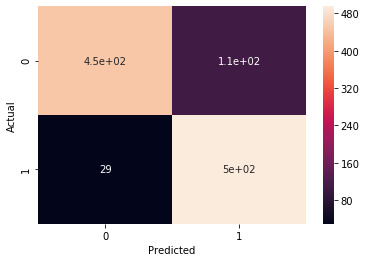

In [36]:
# Get a Confusion Matrix
import seaborn as sns
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       559
           1       0.82      0.94      0.88       524

    accuracy                           0.87      1083
   macro avg       0.88      0.88      0.87      1083
weighted avg       0.88      0.87      0.87      1083



## Combine Social Sciecne and STEM classes

In [38]:
ComtempDf = df[['year','term','code_module','module_domain','Scotland','East Anglian Region','London Region','South Region','North Western Region','West Midlands Region','South West Region','East Midlands Region','South East Region','Wales','Yorkshire Region','North Region','gender','disability','std_half_score','half_sum_clicks','b4_sum_clicks','age_band','module_presentation_length','num_of_prev_attempts','final_result','highest_education','imd_band','studied_credits','date_registration']]
ComtempDf = ComtempDf.loc[(ComtempDf.year == 0)]
# Show first 20 observations of the dataset, this is the combine dataset for 2013 STEM and Social Science Class
ComtempDf.head(5)

,year,term,code_module,module_domain,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,gender,disability,std_half_score,half_sum_clicks,b4_sum_clicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits,date_registration
0,0,0,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,2,261,0,0,3,9.0,60,-68.0
2,0,0,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.581667,565.0,81.0,2,261,0,0,3,3.0,90,-137.0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.816000,612.0,98.0,2,268,0,1,3,9.0,240,-159.0
5,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.388140,147.0,14.0,0,240,2,0,1,2.0,60,-47.0
6,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.000000,0.0,0.0,0,268,0,0,2,4.0,60,-194.0


In [39]:
ComtempDf.count()

year                          12118
term                          12118
code_module                   12118
module_domain                 12118
Scotland                      12118
East Anglian Region           12118
London Region                 12118
South Region                  12118
North Western Region          12118
West Midlands Region          12118
South West Region             12118
East Midlands Region          12118
South East Region             12118
Wales                         12118
Yorkshire Region              12118
North Region                  12118
gender                        12118
disability                    12118
std_half_score                12118
half_sum_clicks               12118
b4_sum_clicks                 12118
age_band                      12118
module_presentation_length    12118
num_of_prev_attempts          12118
final_result                  12118
highest_education             12118
imd_band                      12118
studied_credits             

In [40]:
# Define our predictors
X=ComtempDf[['term','code_module','Scotland','East Anglian Region','London Region','South Region','North Western Region',
          'West Midlands Region','South West Region','East Midlands Region','South East Region','Wales',
          'Yorkshire Region','North Region','gender','disability','b4_sum_clicks','half_sum_clicks','std_half_score',
          'date_registration','age_band','module_presentation_length','num_of_prev_attempts','highest_education','imd_band','studied_credits']]
y=ComtempDf['final_result']

In [41]:
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

Text(0, 0.5, 'Feature Importance Score')

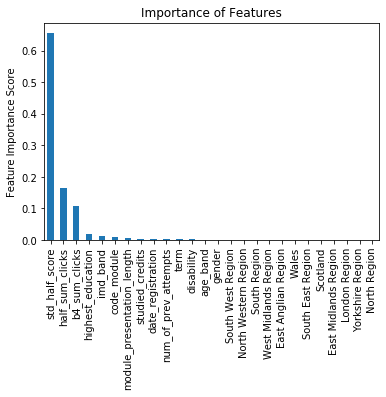

In [42]:
## Run a Baseline Model without Tuning
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

In [46]:
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
y_pred=baseline.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy of the GBM on test set: 0.881
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1618
           1       0.84      0.92      0.88      1412

    accuracy                           0.88      3030
   macro avg       0.88      0.88      0.88      3030
weighted avg       0.88      0.88      0.88      3030



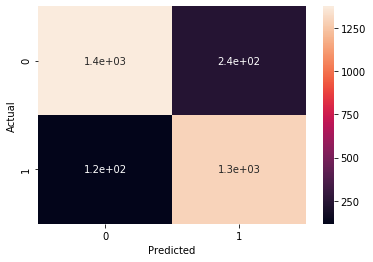

In [47]:
# Get a Confusion Matrix
import seaborn as sns
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [48]:
# Predict 2014 Results
ComtempDf2 = df[['year','term','code_module','Scotland','East Anglian Region','London Region','South Region','North Western Region',
          'West Midlands Region','South West Region','East Midlands Region','South East Region','Wales',
          'Yorkshire Region','North Region','gender','disability','b4_sum_clicks','half_sum_clicks','std_half_score',
          'date_registration','age_band','module_presentation_length','num_of_prev_attempts','highest_education','imd_band','studied_credits','final_result']]
ComtempDf2 = ComtempDf2.loc[(ComtempDf2.year == 1)]

In [49]:
ComtempDf2.count()

year                          16792
term                          16792
code_module                   16792
Scotland                      16792
East Anglian Region           16792
London Region                 16792
South Region                  16792
North Western Region          16792
West Midlands Region          16792
South West Region             16792
East Midlands Region          16792
South East Region             16792
Wales                         16792
Yorkshire Region              16792
North Region                  16792
gender                        16792
disability                    16792
b4_sum_clicks                 16792
half_sum_clicks               16792
std_half_score                16792
date_registration             16792
age_band                      16792
module_presentation_length    16792
num_of_prev_attempts          16792
highest_education             16792
imd_band                      16792
studied_credits               16792
final_result                

In [50]:
comtest = pd.DataFrame(ComtempDf2,columns= ['term','code_module','Scotland','East Anglian Region','London Region','South Region','North Western Region',
          'West Midlands Region','South West Region','East Midlands Region','South East Region','Wales',
          'Yorkshire Region','North Region','gender','disability','b4_sum_clicks','half_sum_clicks','std_half_score',
          'date_registration','age_band','module_presentation_length','num_of_prev_attempts','highest_education','imd_band','studied_credits'])

In [51]:
y_pred_new = baseline.predict(comtest)
y_test_new=ComtempDf2['final_result']

In [52]:
# Print the Accuracy
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test_new, y_pred_new))

Accuracy:  0.8471891376846117


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test_new,y_pred_new))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      9327
           1       0.83      0.82      0.83      7465

    accuracy                           0.85     16792
   macro avg       0.85      0.84      0.85     16792
weighted avg       0.85      0.85      0.85     16792

